In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import time
import numpy as np

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


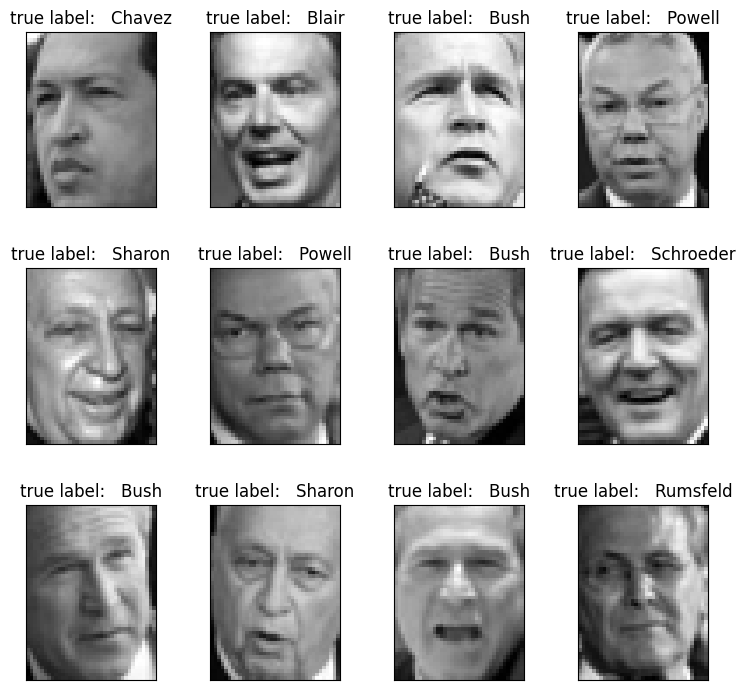

In [ ]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  966 and Testing Data is  322


In [ ]:
import time as tp
n_components = 150

t0 = tp.time()
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)
print("done in % 0.3fs" % (tp.time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = tp.time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (tp.time() - t0))

done in  1.799s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.069s


In [ ]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
        X_train.shape, X_test.shape))

Sample Data point after applying PCA
 [-1.3497149  -1.0167036   1.7700944   0.53824574 -0.8996468  -0.42523158
 -0.9115324   0.99022275  0.4927877  -0.04861111  0.04281772  0.57588094
  0.24591167 -0.00468321  2.773962   -0.37470594 -1.6069094  -2.7752304
  3.9734042  -1.2851138   0.12128967  0.02366722 -0.9604178  -0.32186708
  0.35328126  1.2979844   0.33484522 -0.09994674  2.630177    1.1946586
  0.8736211   0.10575495 -0.7648373   2.1150322   1.3360219  -1.0994893
  0.35852244  2.230828   -0.51776826 -1.7723601  -0.66958326 -0.49672407
  1.1889484  -0.22068807 -1.9565227   1.1697851  -0.78534275 -0.89636326
  2.1732948   1.933213    4.4538193  -0.08257249  1.5588424   2.1475456
 -1.0998465  -0.1694917  -1.5826546   1.2522221   0.13506669 -0.92161155
  1.5653256   0.8639311   0.32592165  0.08626266  4.063931    2.5451126
 -2.0596783   1.397403   -0.14829414  0.93050766 -0.06883867  1.3184029
 -1.6402243  -1.2667762  -3.3873491   1.2100554   1.3862387  -2.2219899
  0.3572061  -0.0877

In [ ]:
print("Fitting the classifier to the training set")
t0 = tp.time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (tp.time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0 = tp.time()
y_pred = clf.predict(X_test_pca)
print("done in % 0.3fs" % (tp.time() - t0))
print(classification_report(y_test, y_pred, target_names = target_names))
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Fitting the classifier to the training set
done in  26.920s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in  0.055s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.89      0.75      0.80       322
     weighted avg       0.87      0.86      0.86       322

Confusion Matrix is:
[[  7   1   0   5   0   0   0]
 [  2  53   1   4   0   0   0]
 [  0   4  17   6   0   0   0]
 [  0   3   0 143   0   0  

Predicting people's names on the test set
done in 0.110s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.85      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.89      0.75      0.80       322
     weighted avg       0.87      0.86      0.86       322



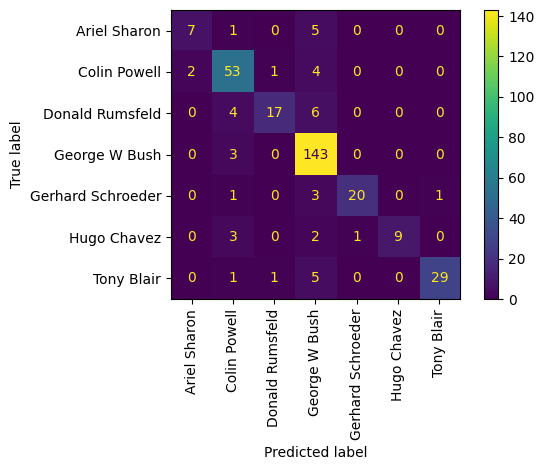

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print("Predicting people's names on the test set")
t0 = tp.time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (tp.time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):

    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

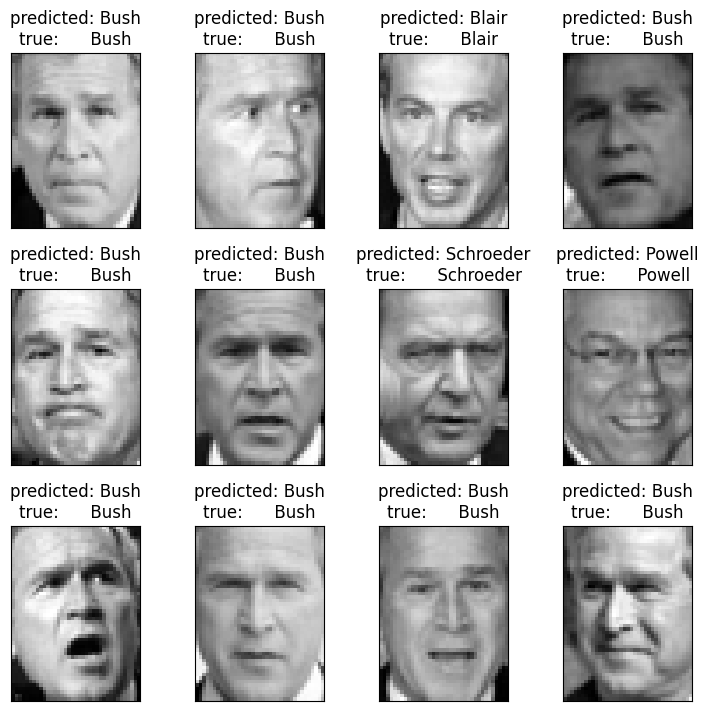

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

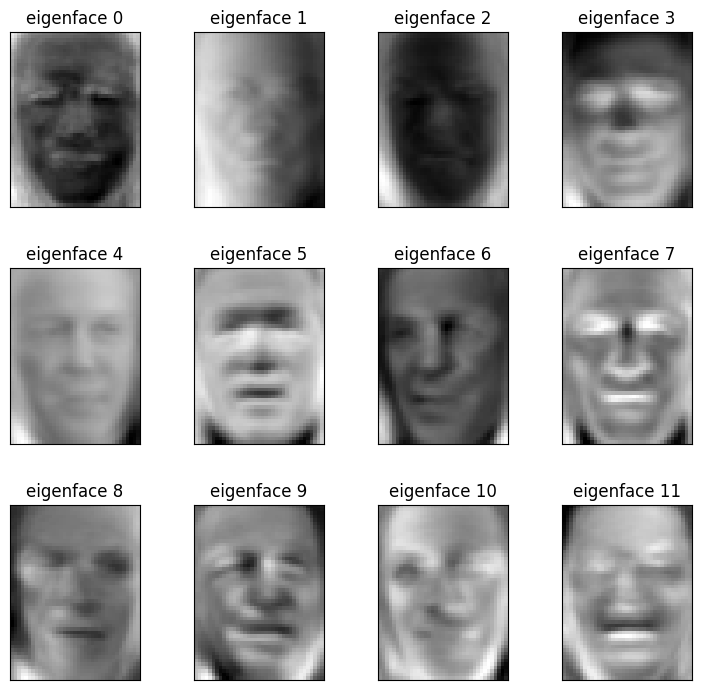

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()